In [62]:
#####Set librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
import warnings
warnings.filterwarnings('ignore')

In [63]:
#####import data including only Aver_delta, R(grain size), and cluster_label
size_ratio_cluster_all = pd.read_csv('size_ratio_cluster_all.csv')
size_ratio_cluster_all.head()

,R,L,clust_label
0,2200.0,2.334865,1
1,26.3,2.247809,0
2,1150.0,2.502850,1
3,15.0,1.062790,0
4,31.0,2.092551,0


In [64]:
#####data split
X_features = size_ratio_cluster_all.iloc[:, :-1]
y_labels = size_ratio_cluster_all.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size = 0.1, stratify = y_labels)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('train shape:', train_cnt)
print('test shape:', test_cnt)

print('ratio for each label value in training set')
print(y_train.value_counts()/train_cnt)
print('ratio for each label value in testing set')
print(y_test.value_counts()/test_cnt)

train shape: 75
test shape: 9
ratio for each label value in training set
0    0.626667
1    0.373333
Name: clust_label, dtype: float64
ratio for each label value in testing set
0    0.666667
1    0.333333
Name: clust_label, dtype: float64


In [65]:
#####Training data
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print('accuracy:{0:.3f}'.format(accuracy_score(y_test, lr_pred)))
print('roc_auc:{0:.3f}'.format(roc_auc_score(y_test, lr_pred)))

accuracy:0.778
roc_auc:0.750


In [66]:
#####Confirm predict values for X_test data
lr_predict = lr_clf.predict_proba(X_test)
lr_predict

array([[0.84334387, 0.15665613],
       [0.81719037, 0.18280963],
       [0.82975099, 0.17024901],
       [0.17415602, 0.82584398],
       [0.78012035, 0.21987965],
       [0.46351159, 0.53648841],
       [0.82904351, 0.17095649],
       [0.39431991, 0.60568009],
       [0.87374893, 0.12625107]])

In [67]:
#####Trained model validation (cross validation)
scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'accuracy', cv = 10)

print('Cross validation accuracy:', np.round(scores, 4))
print('Average accuracy:', np.round(np.mean(scores),4))
recall_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'recall', cv = 10)
print('Cross validation recall:', np.round(recall_scores, 4))
print('Average recall:', np.round(np.mean(recall_scores),4))
precision_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'precision', cv = 10)
print('Cross validation precision:', np.round(precision_scores, 4))
print('Average precision:', np.round(np.mean(precision_scores),4))
precision_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'f1', cv = 10)
print('Cross validation f1:', np.round(precision_scores, 4))
print('Average f1:', np.round(np.mean(precision_scores),4))
roc_auc_scores = cross_val_score(lr_clf, X_features, y_labels, scoring = 'roc_auc', cv = 10)
print('Cross validation roc_auc:', np.round(roc_auc_scores, 4))
print('Average roc_auc:', np.round(np.mean(roc_auc_scores),4))

Cross validation accuracy: [0.7778 0.7778 0.7778 0.6667 0.75   1.     0.625  1.     0.625  0.875 ]
Average accuracy: 0.7875
Cross validation recall: [0.5    0.6667 0.3333 0.6667 0.3333 1.     0.     1.     0.6667 0.6667]
Average recall: 0.5833
Cross validation precision: [1.     0.6667 1.     0.5    1.     1.     0.     1.     0.5    1.    ]
Average precision: 0.7667
Cross validation f1: [0.6667 0.6667 0.5    0.5714 0.5    1.     0.     1.     0.5714 0.8   ]
Average f1: 0.6276
Cross validation roc_auc: [1.     0.8333 0.9444 0.8889 0.7333 1.     0.9333 1.     0.7333 0.8667]
Average roc_auc: 0.8933


In [68]:
#####Import frame data set for probability map
Data = pd.read_csv('size_ratio50x50.csv')
Data.head()

,R,L
0,10.000000,1.0
1,52.653061,1.0
2,95.306122,1.0
3,137.959184,1.0
4,180.612245,1.0


In [69]:
#####Predict the frame data set
X_features_size_ratio50x50 = Data[['R','L']].values
lr_pred = lr_clf.predict(X_features_size_ratio50x50)
lr_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
#####Confrim predict_proba values of the predicted frame data set
probability = lr_clf.predict_proba(X_features_size_ratio50x50)
Data['probability'] = probability[:, 1]
Data.head()

,R,L,probability
0,10.000000,1.0,0.094481
1,52.653061,1.0,0.110864
2,95.306122,1.0,0.129680
3,137.959184,1.0,0.151147
4,180.612245,1.0,0.175452


In [71]:
#####Construct DataFrame for the predicted frame data set
plt.rcParams['figure.figsize'] = [10, 8]

df = Data.pivot('L','R', 'probability')
df=df.sort_values(by='L', ascending=False)
df.head(10)

R,10.000000,52.653061,95.306122,137.959184,180.612245,223.265306,265.918367,308.571429,351.224490,393.877551,...,1716.122449,1758.775510,1801.428571,1844.081632,1886.734694,1929.387755,1972.040816,2014.693877,2057.346939,2100.000000
L,,,,,,,,,,,,,,,,,,,,,
5.000000,0.329119,0.369581,0.411964,0.455693,0.500116,0.544538,0.588262,0.630635,0.671086,0.709150,...,0.998365,0.998631,0.998854,0.999041,0.999197,0.999328,0.999438,0.999530,0.999606,0.999671
4.918367,0.322182,0.362252,0.404333,0.447869,0.492219,0.536692,0.580589,0.623247,0.664076,0.702592,...,0.998312,0.998587,0.998817,0.999010,0.999172,0.999307,0.999420,0.999514,0.999594,0.999660
4.836735,0.315322,0.354986,0.396748,0.440071,0.484326,0.528829,0.572878,0.615801,0.656993,0.695949,...,0.998258,0.998542,0.998780,0.998979,0.999145,0.999285,0.999401,0.999499,0.999581,0.999649
4.755102,0.308542,0.347786,0.389212,0.432302,0.476441,0.520951,0.565131,0.608300,0.649839,0.689223,...,0.998202,0.998495,0.998740,0.998946,0.999118,0.999262,0.999382,0.999483,0.999567,0.999638
4.673469,0.301843,0.340655,0.381729,0.424566,0.468567,0.513063,0.557352,0.600748,0.642617,0.682417,...,0.998145,0.998447,0.998700,0.998912,0.999089,0.999238,0.999362,0.999466,0.999553,0.999626
4.591837,0.295228,0.333596,0.374302,0.416867,0.460709,0.505168,0.549545,0.593147,0.635330,0.675531,...,0.998085,0.998397,0.998658,0.998877,0.999060,0.999213,0.999342,0.999449,0.999539,0.999614
4.510204,0.288698,0.326610,0.366933,0.409209,0.452871,0.497270,0.541713,0.585502,0.627980,0.668569,...,0.998024,0.998346,0.998615,0.998841,0.999030,0.999188,0.999321,0.999431,0.999524,0.999602
4.428571,0.282254,0.319701,0.359626,0.401594,0.445056,0.489374,0.533861,0.577815,0.620570,0.661532,...,0.997961,0.998293,0.998571,0.998804,0.998999,0.999162,0.999299,0.999413,0.999509,0.999589
4.346939,0.275899,0.312870,0.352384,0.394026,0.437267,0.481483,0.525991,0.570090,0.613104,0.654423,...,0.997895,0.998238,0.998525,0.998766,0.998967,0.999135,0.999276,0.999394,0.999493,0.999576


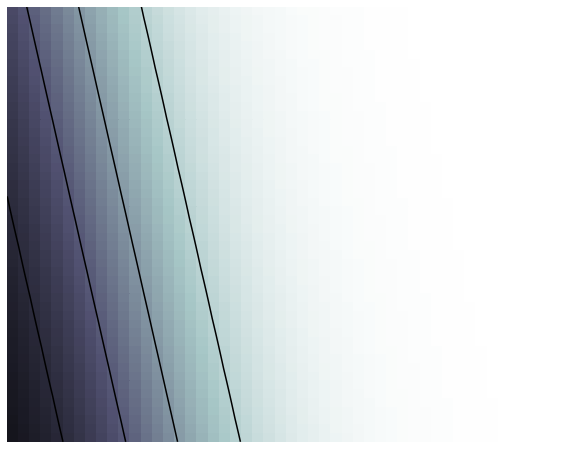

<Figure size 720x720 with 0 Axes>

In [72]:
# Visualizing the predicted frame data set
fig,ax = plt.subplots()

smooth_scale = 1
z = ndimage.zoom(df.to_numpy(), smooth_scale)
cntr = ax.contour(np.linspace(0, len(df.columns), len(df.columns) * smooth_scale),
                  np.linspace(0, len(df.index), len(df.index) * smooth_scale),
                  z, levels=(0.2, 0.4, 0.6, 0.8), colors='black')
ax = sns.heatmap(df, cbar=False, ax=ax, cmap='bone', vmin=0, vmax=1)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()
figure = ax.get_figure()
#figure.savefig('size_ratio_probability_map_all.pdf', dpi=600)

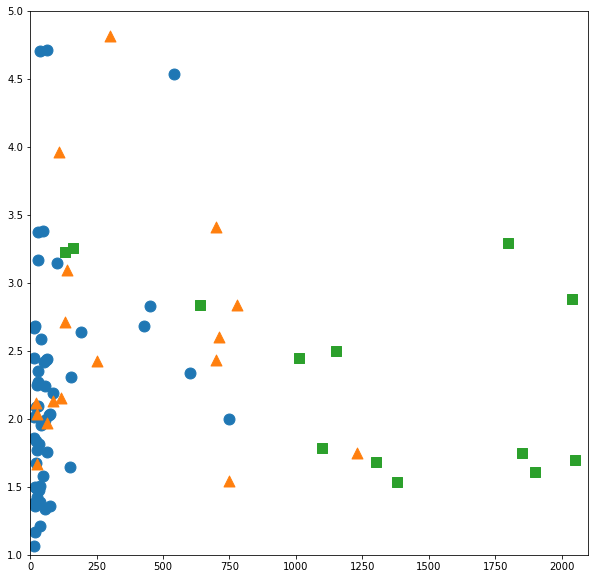

In [73]:
#####Visualizing spinel data set
size_ratio_cluster_all_three = pd.read_csv('size_ratio_cluster_all_three.csv')
marker0_ind = size_ratio_cluster_all_three[size_ratio_cluster_all_three['clust_label'] == 0].index
marker1_ind = size_ratio_cluster_all_three[size_ratio_cluster_all_three['clust_label'] == 1].index
marker2_ind = size_ratio_cluster_all_three[size_ratio_cluster_all_three['clust_label'] == 2].index

plt.rcParams["figure.figsize"] = (10, 10)
plt.scatter(x = size_ratio_cluster_all_three.loc[marker0_ind, 'R'], y = size_ratio_cluster_all_three.loc[marker0_ind, 'L'], 
            marker = 'o', s=120)
plt.scatter(x = size_ratio_cluster_all_three.loc[marker1_ind, 'R'], y = size_ratio_cluster_all_three.loc[marker1_ind, 'L'], 
            marker = '^', s=120)
plt.scatter(x = size_ratio_cluster_all_three.loc[marker2_ind, 'R'], y = size_ratio_cluster_all_three.loc[marker2_ind, 'L'], 
            marker = 's', s=120)

plt.xlim([0, 2100])
plt.ylim([1, 5])
#plt.savefig('size_ratio_scatter.pdf', dpi=600)
plt.show()